In [7]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(1, './lib/python3.7/site-packages')
import googletrans
import matplotlib.pyplot as plt; plt.rcdefaults()

In [2]:
!which python

/c/Users/HP/anaconda3/envs/pandas_projects/python


In [3]:
import os
os.getcwd()                                                  #ensuring the path of working directory

'G:\\Udemy\\Data Analysis with Pandas and Python\\Pandas Projects'

In [8]:
data = pd.read_csv("amazon_enc.csv", thousands = ".")

In [5]:
data.shape

(6454, 5)

In [6]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


In [7]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,522.696312
std,5.746654,1554.846486
min,1998.000000,0.000000
25%,2002.000000,9.000000
50%,2007.000000,54.000000
75%,2012.000000,269.000000
max,2017.000000,25963.000000


In [8]:
data.describe(include = "all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2013-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [9]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [9]:
data = data.replace(0, np.nan)
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,NaN,1998-01-01
1,1999,Acre,Janeiro,NaN,1999-01-01
2,2000,Acre,Janeiro,NaN,2000-01-01
3,2001,Acre,Janeiro,NaN,2001-01-01
4,2002,Acre,Janeiro,NaN,2002-01-01


In [11]:
data.shape

(6454, 5)

In [10]:
data2 = data.dropna(subset=["number"])                         #dropna - drop all the NaN(missing) values
data2.head()

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,2003-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
12,2010,Acre,Janeiro,1.0,2010-01-01
17,2015,Acre,Janeiro,1.0,2015-01-01


In [13]:
data2.info                                                     #Here the row has been reduced

<bound method DataFrame.info of       year      state     month  number        date
5     2003       Acre   Janeiro    10.0  2003-01-01
7     2005       Acre   Janeiro    12.0  2005-01-01
8     2006       Acre   Janeiro     4.0  2006-01-01
12    2010       Acre   Janeiro     1.0  2010-01-01
17    2015       Acre   Janeiro     1.0  2015-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

[5837 rows x 5 columns]>

In [14]:
data2.describe(include = "all")

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [11]:
forest_fire_by_month = data2.groupby('month')['number'].sum()   #grouping the dataset by month, summing the numbers 
forest_fire_by_month.head()                                     #resulting in series

month
Abril         28364.0
Agosto       740841.0
Dezembro     152596.0
Fevereiro     30952.0
Janeiro       52587.0
Name: number, dtype: float64

In [12]:
print(forest_fire_by_month)

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64


In [13]:
months_unique = list(data.month.unique())
months_unique

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [14]:
forest_fire_by_month = forest_fire_by_month.reindex(months_unique, axis=0)
forest_fire_by_month

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64

In [15]:
forest_fire_by_month = forest_fire_by_month.to_frame()                     #converting the series into dataframe
forest_fire_by_month

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0
Junho,111405.0
Julho,217620.0
Agosto,740841.0
Setembro,1015925.0


In [16]:
forest_fire_by_month.reset_index(level=0, inplace = True)                 #resetting index from month as being index
forest_fire_by_month.head()

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0


In [17]:
from googletrans import Translator
translator = Translator() #create an object of Translator 
for month in months_unique: 
    detected = translator.detect(month)     
    translated = translator.translate(month)     
    print(detected)     
    print(translated)     
    print("...")

Detected(lang=en, confidence=0.6906946)
Translated(src=en, dest=en, text=Janeiro, pronunciation=Janeiro, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=February, pronunciation=February, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=March, pronunciation=March, extra_data="{'translat...")
...
Detected(lang=es, confidence=0.47058824)
Translated(src=es, dest=en, text=April, pronunciation=April, extra_data="{'translat...")
...
Detected(lang=pt, confidence=0.75)
Translated(src=pt, dest=en, text=May, pronunciation=May, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=June, pronunciation=June, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=July, pronunciation=July, extra_data="{'translat...")
...
Detected(lang=es, confidence=0.37796605)
Translated(src=es, dest=en, text=August, pronunciation

In [18]:
from googletrans import Translator
translator2 = Translator() #create a new object of Translator. #cannot use the one defined before as that contains the latest #month’s calculated value
for i, m in enumerate(forest_fire_by_month['month']):
    translated = translator2.translate(m)  
    month1 = translated.text    
    forest_fire_by_month.at[i, 'month'] = month1
    
         

In [19]:
print(forest_fire_by_month)

        month     number
0     Janeiro    52587.0
1    February    30952.0
2       March    35118.0
3       April    28364.0
4         May    46083.0
5        June   111405.0
6        July   217620.0
7      August   740841.0
8   September  1015925.0
9     October   629665.0
10   November   312326.0
11   December   152596.0


In [35]:
plt.figure(figsize=(25,15))                         #specifying width and height

<Figure size 2500x1500 with 0 Axes>

<Figure size 2500x1500 with 0 Axes>

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

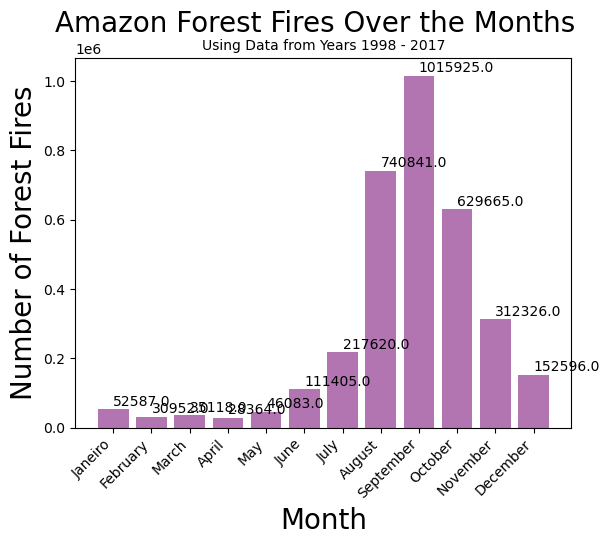

In [38]:
#plt.bar(x-values, y-values) 
plt.bar(forest_fire_by_month['month'],forest_fire_by_month['number'],color = (0.5,0.1,0.5,0.6))



#use .suptitle for the actual title and .title for the subheading
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20) 
plt.title('Using Data from Years 1998 - 2017', fontsize=10)  
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)



#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)
#this adds text at the top of each bar indicating its value
for i, num in enumerate(forest_fire_by_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='left',
        fontsize=10) 
    
    
    
#plt.setp is to set a property on an artist object.
#plt.gca() gets the current axes (gca) instance on the current figure #matching the given keyword args.
#xticklabels and yticklabels are nothing but the values of the #lables on the x and y axis.
#The code below lets us set the fontsize and alignment of the x and #y axis tick labels
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=10)
plt.setp(plt.gca().get_yticklabels(), fontsize=10)    
    